In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision
import pytorch_lightning as pl

import beatbrain
from beatbrain import helpers, models, datasets, utils
from beatbrain.utils.config import get_default_config

In [3]:
config = get_default_config()
model = models.MNISTAutoencoder(config.hparams)

In [ ]:
# trainer = pl.Trainer(
#     gpus=[0],
#     max_epochs=50,
#     progress_bar_refresh_rate=1,
#     logger=pl.loggers.TestTubeLogger(config.trainer),
# )
trainer = helpers.train.get_trainer(**config.trainer)
trainer.fit(model)

INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:
   | Name       | Type                | Params
-----------------------------------------------
0  | encoder    | Sequential          | 4 K   
1  | encoder.0  | Conv2d              | 416   
2  | encoder.1  | MaxPool2d           | 0     
3  | encoder.2  | ReLU                | 0     
4  | encoder.3  | Conv2d              | 3 K   
5  | encoder.4  | MaxPool2d           | 0     
6  | encoder.5  | ReLU                | 0     
7  | encoder.6  | Conv2d              | 603   
8  | encoder.7  | MaxPool2d           | 0     
9  | encoder.8  | ReLU                | 0     
10 | decoder    | Sequential          | 2 K   
11 | decoder.0  | Conv2d              | 224   
12 | decoder.1  | ReLU                | 0     
13 | decoder.2  | UpsamplingNearest2d | 0     
14 | decoder.3  | Conv2d              | 584   
15 | decoder.4  | ReLU                | 0     
16 | decoder.5  | UpsamplingNearest2d | 0     
17

In [5]:
torch.save(model.state_dict(), "models/mnist_autoencoder.pt")

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

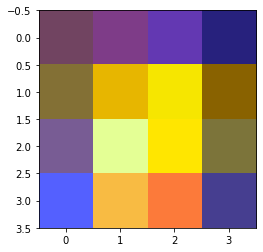

In [46]:
dataset = torchvision.datasets.MNIST(root="data/mnist", train=False, transform=torchvision.transforms.ToTensor())
sample_input = dataset[0][0].unsqueeze(0)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
model.to(device)
sample_input = sample_input.to(device)
latent, recon = model(sample_input)
latent, recon = latent.cpu().detach().numpy()[0].transpose(1, 2, 0), recon.cpu().detach().numpy()[0].transpose(1, 2, 0)

plt.imshow(latent / latent.max(axis=(0, 1)))
plt.show()

# Image.fromarray(latent)